<a href="https://colab.research.google.com/github/wagenadl/leechem/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install leechem


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for leechem: filename=leechem-1.2-py3-none-any.whl size=51623 sha256=99619724084a8b22d01e2446d4f25fb6d65ebf118fe9af0b5340a1235e50150e
  Stored in directory: /root/.cache/pip/wheels/3d/92/b7/dedbd5c705e84e53ddbfef6c03a03886a97cfcdec39b4b7837
Successfully built leechem


In [2]:
import leechem
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
############ GENERAL PREPARATION #####################################
# Connect to the tracing database
db = leechem.sbemdb.SBEMDB()

# Create a mapping object for converting between various forms of neuron ID
mp = leechem.mapping.Mapping()


Trial 9 download complete                     


Text(0.5, 1.0, 'VSD trace of DE-3(R) during local bend trial #9')

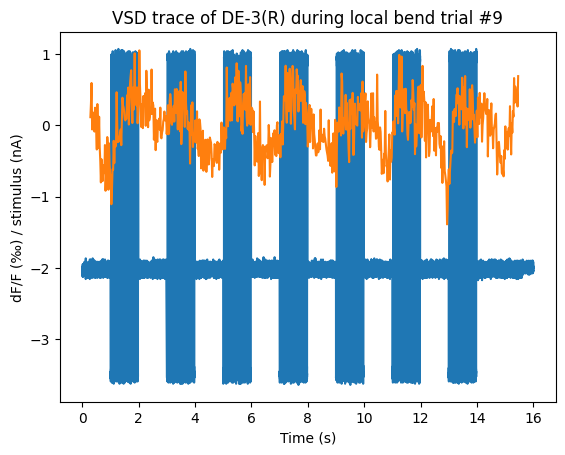

In [7]:
############ VSD/EPHYS EXAMPLE #######################################
# Load electrophysiology/VSD trial #9 (an example of local bending)
tr = leechem.trials.Trial(9)

# Extract timing of electrophysiological stimulus
stm = tr.stimuli()['P_VL']
tt, t_unit = stm.timestamps()
ii, i_unit = stm.trace()

# Plot the stimulus
plt.interactive(True)
plt.figure()
plt.plot(tt, ii)
plt.xlabel(f'Time ({t_unit})')
plt.ylabel(f'dF/F (‰) / stimulus ({i_unit})')

# Extract timestamps for the VSD recording
tt = tr.vsd().timestamps()[0]

# Find ROI associated with cell DE-3(R)
roiid = mp.mapCanonicalNameToROIID('3_R')

# Extract VSD trace from cell DE-3(R)
dff = tr.vsd().trace(roiid)[0]                                               

# Plot the VSD trace over the stimulus
plt.plot(tt, dff*10)
plt.title('VSD trace of DE-3(R) during local bend trial #9')

Trial 6 download complete                     


Text(0.5, 1.0, 'VSD trace of DE-3(R) and 1_R during swim trial #6')

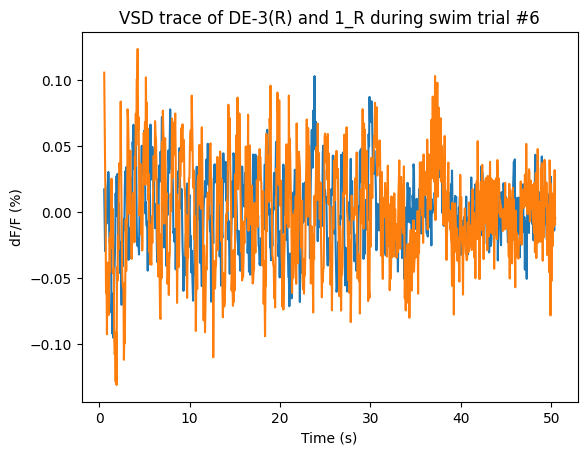

In [8]:
############ VSD/EM EXAMPLE ##########################################
# Load electrophysiology/VSD trial #6 (an example of fictive swimming)
tr = leechem.trials.Trial(6)

# Extract timestamps for the VSD recording
tt = tr.vsd().timestamps()[0]

# Find ROI associated with cell DE-3(R)
roiid = mp.mapCanonicalNameToROIID('3_R')

# Extract VSD trace from cell DE-3(R)
yy=tr.vsd().trace(roiid)[0]                                               

# Plot the trace
plt.interactive(True)
plt.figure()
plt.plot(tt, yy)
plt.xlabel('Time (s)')
plt.ylabel('dF/F (%)')
plt.title('VSD trace of DE-3(R) during swim trial #6')

# Get list of all trees presynaptic to DE-3
pretrees = db.presyntrees()

# Construct a dict of ROI IDs associated with those trees and a dict mapping
# ROI IDs to synapse counts
roimap = {}
syncount = {}
for tid in pretrees.keys():
    roi = mp.mapTreeIDToROIID(tid)
    if roi is not None:
        roimap[roi] = tid
        syncount[roi] = pretrees[tid][0]
        
# Get ROI IDs in order of decreasing synapse counts
rois = list(syncount.keys())
counts = [ syncount[roi] for roi in rois ]
ordr = np.argsort(counts)
rois = [rois[k] for k in ordr][::-1]
counts = [counts[k] for k in ordr][::-1]

# Retrieve identity of most highly connected neuron
name = mp.mapROIIDToCanonicalName(rois[0])

# Plot its activity over the previous trace
yy=tr.vsd().trace(rois[0])[0]                                               
plt.plot(tt, yy)
plt.xlabel('Time (s)')
plt.ylabel('dF/F (%)')
plt.title(f'VSD trace of DE-3(R) and {name} during swim trial #6')


Text(0.5, 1.0, 'Fullly reconstructed tree of DE-3(R)')

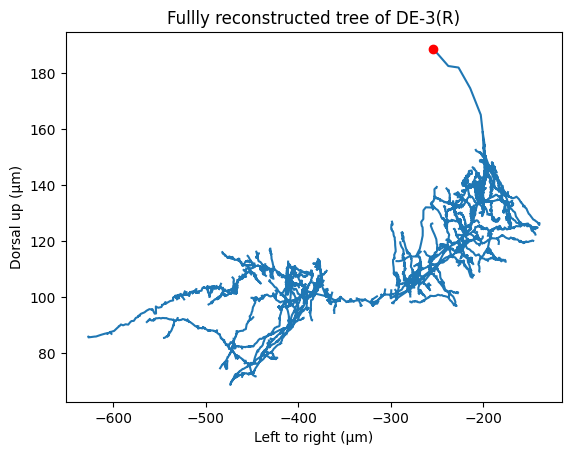

In [9]:
############### GEOMETRY EXAMPLE #1 ##################################
# Retrieve geometry of DE-3 from database
tid = mp.mapCanonicalNameToTreeID('3_R')
xyz = db.segments(tid)
xyz_soma = db.nodexyz(f'tid=={tid} and typ==1')

# Plot it with dorsal side up
plt.figure()
plt.plot(-xyz[1], xyz[0]) # Plot tree
plt.plot(-xyz_soma[1], xyz_soma[0], 'ro') # Plot soma position in red
plt.xlabel('Left to right (μm)')
plt.ylabel('Dorsal up (μm)')
plt.title('Fullly reconstructed tree of DE-3(R)')


Text(0.5, 1.0, 'Fullly reconstructed tree of DE-3(R) and partial tree of DI-1(R)')

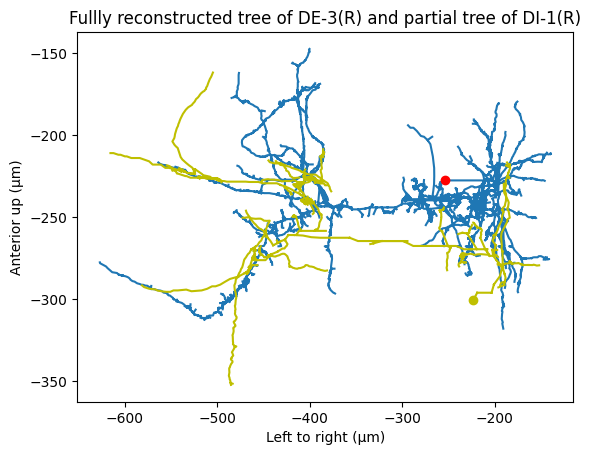

In [10]:
# Plot it with anterior up and right to the right
plt.figure()
plt.plot(-xyz[1], -xyz[2]) # Plot tree
plt.plot(-xyz_soma[1], -xyz_soma[2], 'ro') # Plot soma position in red
plt.xlabel('Left to right (μm)')
plt.ylabel('Anterior up (μm)')
plt.title('Fullly reconstructed tree of DE-3(R)')

# Retrieve partially traced geometry of DI-1 (the most connected pre-
# synaptic partner)
tid =  mp.mapCanonicalNameToTreeID('1_R')
xyz = db.segments(tid)
xyz_soma = db.nodexyz(f'tid=={tid} and typ==1')

# Add its tree to the plot
plt.plot(-xyz[1], -xyz[2], 'y') # Plot tree
plt.plot(-xyz_soma[1], -xyz_soma[2], 'yo') # Plot soma position
plt.title('Fullly reconstructed tree of DE-3(R) and partial tree of DI-1(R)')


Text(0.5, 1.0, 'Postsynaptic distance along tree for synapses from DI-1(R) onto DE-3(R)')

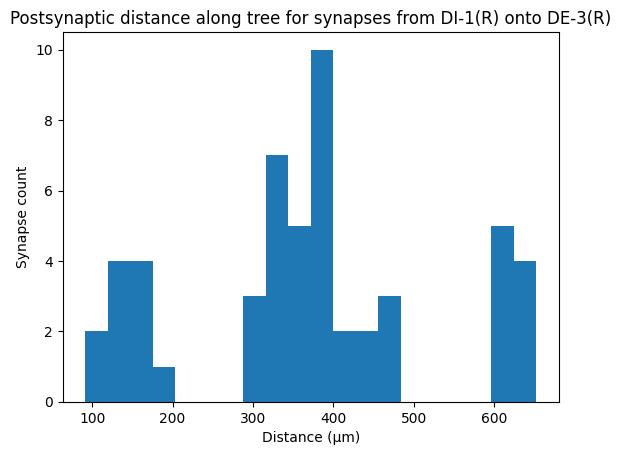

In [11]:
################ GEOMETRY EXAMPLE #2 #################################
# Find distances to all tree nodes in DE-3(R)
tid =  mp.mapCanonicalNameToTreeID('3_R')
x,y,z,nid = db.somaxyz(tid)
dd = db.distanceAlongTree(nid)

# Find synapses onto DE-3(R)
x,y,z,pretid,posttid,synid,prenid,postnid = db.synapses(f'post.tid={tid}', True)

# Now construct a map from presynaptic tree ID to a list of distances
# along the DE-3(R) tree of its synapses
syndist = {}
for k in range(len(pretid)):
    if pretid[k] not in syndist:
        syndist[pretid[k]] = []
    syndist[pretid[k]].append(dd[postnid[k]])
for t in syndist:
    syndist[t] = np.array(syndist[t])
    
# Histogram of distances from synapses from DE-1(R) to the soma of DE-3(R):
n,x = np.histogram(syndist[mp.mapCanonicalNameToTreeID('1_R')], bins=20)
dx = x[1] - x[0]
plt.figure()
plt.bar((x[:-1] + x[1:])/2, n, dx)
plt.xlabel('Distance (μm)')
plt.ylabel('Synapse count')
plt.title('Postsynaptic distance along tree for synapses from DI-1(R) onto DE-3(R)')


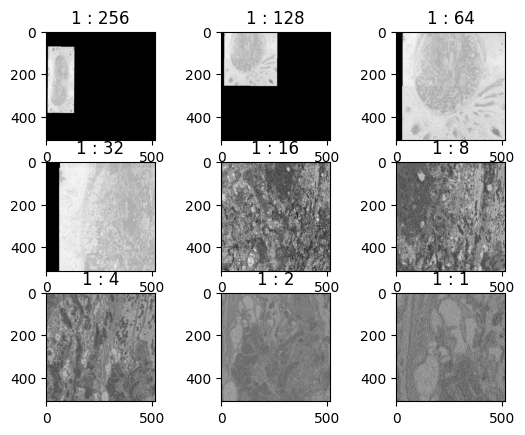

In [12]:
########################## RAW EM DATA EXAMPLE #1 ######################
idb = leechem.sbemimage.ImageDB()
# A series of 2x-zoom steps into the raw data
f, ax = plt.subplots(3,3)
x = 30
y = 150
z = 3000
for a in range(9):
    ax.flat[8-a].imshow(idb.tile(x, y, z, a), cmap='gray')
    x //= 2
    y //= 2
    ax.flat[8-a].set_title(f'1 : {2**a}')



Text(0.5, 1.0, 'A synapse between DI-1R and DE-3R')

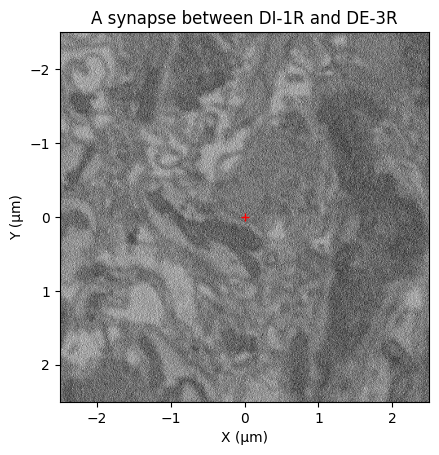

In [13]:
########################## RAW EM DATA EXAMPLE #2 ######################
# A piece of 5x5 um of raw EM image around a synapse
tid_de3 = mp.mapCanonicalNameToTreeID('3_R')
tid_di1 = mp.mapCanonicalNameToTreeID('1_R')
where = f'post.tid={tid_de3} and pre.tid={tid_di1}'
xx,yy,zz,pretid,posttid,synid,prenid,postnid = db.synapses(where, True)

k = 49
x,y,z = db.onenodexyz(postnid[k])
a = 1
ix, iy, iz = idb.umtopix(x,y,z, a)
sx, sy, sz = idb.voxelsize(a)
w = int(5/sx)
h = int(5/sy)
img = idb.roi(ix-w//2, iy-h//2, iz, w, h, a)
plt.figure()
plt.imshow(img, cmap='gray', extent=(-2.5, 2.5, 2.5, -2.5))
plt.plot(0, 0, '+', color='r')
plt.xlabel('X (μm)')    
plt.ylabel('Y (μm)')    
plt.title('A synapse between DI-1R and DE-3R')
